In [2]:
from datasets import load_dataset
from tqdm import tqdm
import pandas as pd
import pyarrow as pa
import pyarrow.compute as pc
import re
import pyarrow.dataset as ds

/Users/aadityabhat/Documents/wiki_gpt/venv/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
dataset = load_dataset("wikipedia", "20220301.en", split="train")

Found cached dataset wikipedia (/Users/aadityabhat/.cache/huggingface/datasets/wikipedia/20220301.en/2.0.0/aa542ed919df55cc5d3347f42dd4521d05ca68751f50dbc32bae2a7f1e167559)


In [3]:
data_df = dataset.to_pandas()

In [6]:
def keep_intro(text):
    return re.sub(r'\(\W*\)', '', ' '.join(text.split('\n\n')[:2]))

In [7]:
data_df['intro'] = data_df.apply(lambda row: keep_intro(row['text']), axis=1)

In [9]:
data_df[['id', 'title', 'url', 'intro']].to_csv('wiki_intro.csv', index=False)

In [3]:
data_df = pd.read_csv('wiki_intro.csv')

In [4]:
len(data_df)

6458670

In [5]:
data_df

,id,title,url,intro
0,12,Anarchism,https://en.wikipedia.org/wiki/Anarchism,Anarchism is a political philosophy and moveme...
1,25,Autism,https://en.wikipedia.org/wiki/Autism,Autism is a neurodevelopmental disorder charac...
2,39,Albedo,https://en.wikipedia.org/wiki/Albedo,Albedo is the measure of the diffuse reflecti...
3,290,A,https://en.wikipedia.org/wiki/A,"A, or a, is the first letter and the first vow..."
4,303,Alabama,https://en.wikipedia.org/wiki/Alabama,Alabama is a state in the Southeastern region...
...,...,...,...,...
6458665,70201819,Bianca Fernandez,https://en.wikipedia.org/wiki/Bianca%20Fernandez,Bianca Jolie Fernandez (born 24 February 2004)...
6458666,70201882,Condons and Clangibbon,https://en.wikipedia.org/wiki/Condons%20and%20...,Condons and Clangibbon is a barony in County ...
6458667,70201886,2022 Chattanooga Red Wolves SC season,https://en.wikipedia.org/wiki/2022%20Chattanoo...,The 2022 Chattanooga Red Wolves SC season will...
6458668,70201947,Nkiko Prosper,https://en.wikipedia.org/wiki/Nkiko%20Prosper,Turatsinze Nkiko Prosper (born 1985) professio...


## Data Cleaning

In [14]:
data_df = data_df[data_df.apply(lambda x : len(str(x['title'])) > 1, axis = 1)]

In [15]:
data_df['intro_len'] = data_df.apply(lambda row: len(row['intro'].split(' ')), axis = 1)

/var/folders/b5/qwcw21mn3973c1z_c12dw6hw0000gn/T/ipykernel_849/2014648341.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_df['intro_len'] = data_df.apply(lambda row: len(row['intro'].split(' ')), axis = 1)


<AxesSubplot: >

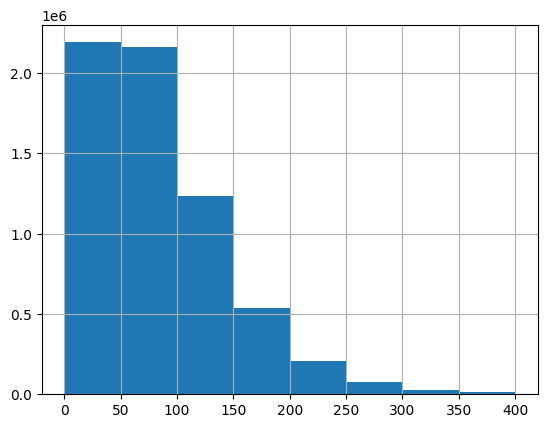

In [16]:
data_df['intro_len'].hist(bins=[0,50,100,150,200,250,300,350,400])

In [20]:
data_df = data_df[data_df['intro_len'].between(150, 350)]

In [23]:
data_df['title_len'] = data_df.apply(lambda row: len(row['title'].split(' ')), axis = 1)

<AxesSubplot: >

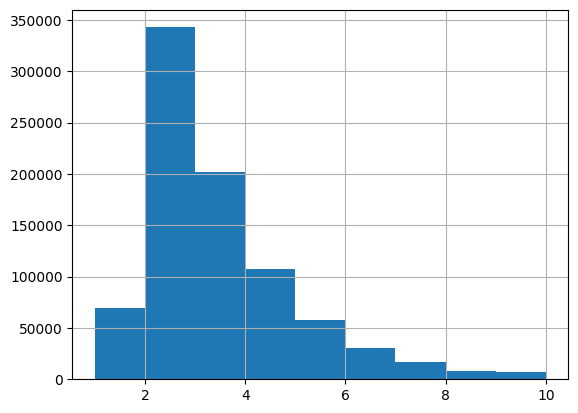

In [26]:
data_df.title_len.hist(bins=[1,2,3,4,5,6,7,8,9,10])

In [27]:
data_df = data_df[data_df['title_len'] < 4]

In [34]:
data_df = data_df.sample(n=150000, random_state=1111)

<AxesSubplot: >

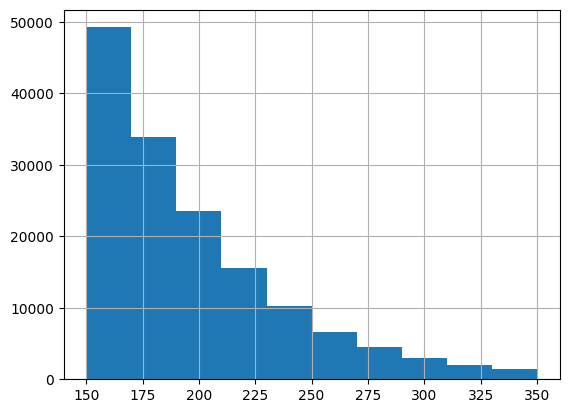

In [35]:
data_df['intro_len'].hist()

In [4]:
data_df['starter_text'] = data_df['intro'].apply(lambda x: ' '.join(str(x).split(' ')[:7]))

In [6]:
data_df.to_csv('wiki_intro_processed.csv', index=False)